## Important Libraries

In [102]:
import pandas as pd
import numpy as np
import os 
import pickle
import cv2
import random
from tqdm import tqdm
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Flatten,BatchNormalization,Input,Conv2D,MaxPool2D,Dropout
from keras.models import Model,Sequential,load_model
from keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Initial Hyperparameters

In [70]:
Img_size=(100,100)
batch_size=32
seed=42
categories=['cats','dogs']
img_train_dir=r'training_set\training_set'
img_test_dir=r'test_set\test_set'

## Read Training Data and Show it by OS 

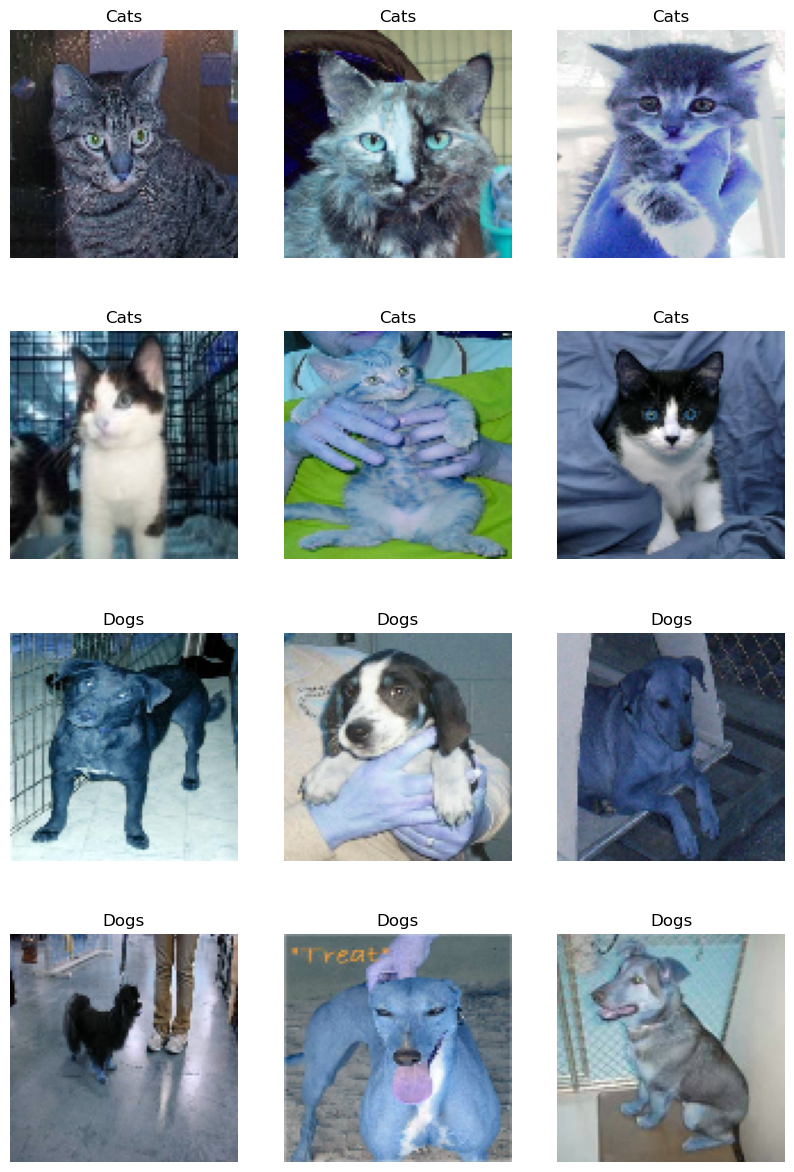

In [2]:
y=1
plt.figure(figsize=(10,15))
for category in categories:
    path=os.path.join(img_train_dir,category)
    x=0
    for img in os.listdir(path):
        try:
            img_arr=cv2.imread(os.path.join(path,img))
            new_img=cv2.resize(img_arr,Img_size)
            if x<6:    
                plt.subplot(4,3,y)
                plt.title(category.capitalize())
                plt.axis('off')
                plt.imshow(new_img)
                x+=1
                y+=1
            else:
                break        
        except Exception as e:
            pass
plt.show()            

In [3]:
training_data=[]
for category in categories:
    path=os.path.join(img_train_dir,category)
    label_num=categories.index(category)
    for img in tqdm(os.listdir(path)):
        try:
            img_arr=cv2.imread(os.path.join(path,img))
            new_img=cv2.resize(img_arr,Img_size)
            new_img=new_img/255
            training_data.append([new_img,label_num])
        except Exception as e:
            pass    

100%|██████████| 4006/4006 [05:31<00:00, 12.07it/s]


In [4]:
random.shuffle(training_data)
training_data[:5]

[[array([[[0.03137255, 0.03137255, 0.03137255],
          [0.03137255, 0.03137255, 0.03137255],
          [0.02352941, 0.02352941, 0.02352941],
          ...,
          [0.11764706, 0.10196078, 0.09803922],
          [0.19215686, 0.21568627, 0.19607843],
          [0.18431373, 0.18431373, 0.18431373]],
  
         [[0.03137255, 0.03137255, 0.03137255],
          [0.03137255, 0.03137255, 0.03137255],
          [0.03137255, 0.03137255, 0.03137255],
          ...,
          [0.10980392, 0.09019608, 0.09803922],
          [0.10588235, 0.1254902 , 0.11764706],
          [0.16078431, 0.16078431, 0.16078431]],
  
         [[0.03529412, 0.03529412, 0.03529412],
          [0.03529412, 0.03529412, 0.03529412],
          [0.04313725, 0.04313725, 0.04313725],
          ...,
          [0.13333333, 0.11372549, 0.12156863],
          [0.09411765, 0.10980392, 0.11372549],
          [0.10196078, 0.10196078, 0.10196078]],
  
         ...,
  
         [[0.53333333, 0.56470588, 0.70196078],
          [0.3

In [5]:
x_train=[]
y_train=[]
for record in training_data:
    x,y=record
    x_train.append(x)
    y_train.append(y)    

In [6]:
x_train=np.array(x_train).reshape(-1,Img_size[0],Img_size[0],3)
y_train=np.array(y_train)

## Read Training Data by ImageDataGenerator in Keras Library

Read Training Data and Split it to Training & Validation :

1- Training Data

In [71]:
train_Generator=ImageDataGenerator(
                                    rescale=1./255,
                                    validation_split=0.15
                                    )
train_data=train_Generator.flow_from_directory(directory=img_train_dir,
                                                subset='training',
                                                target_size=Img_size,
                                                color_mode='rgb',
                                                class_mode='binary',
                                                shuffle=True,
                                                batch_size=batch_size,
                                                seed=seed)

Found 6805 images belonging to 2 classes.


2- Validation Data 

In [72]:
val_data=train_Generator.flow_from_directory(directory=img_train_dir,
                                                subset='validation',
                                                target_size=Img_size,
                                                color_mode='rgb',
                                                class_mode='binary',
                                                shuffle=False,
                                                batch_size=batch_size)

Found 1200 images belonging to 2 classes.


## Read Testing Data and Show it

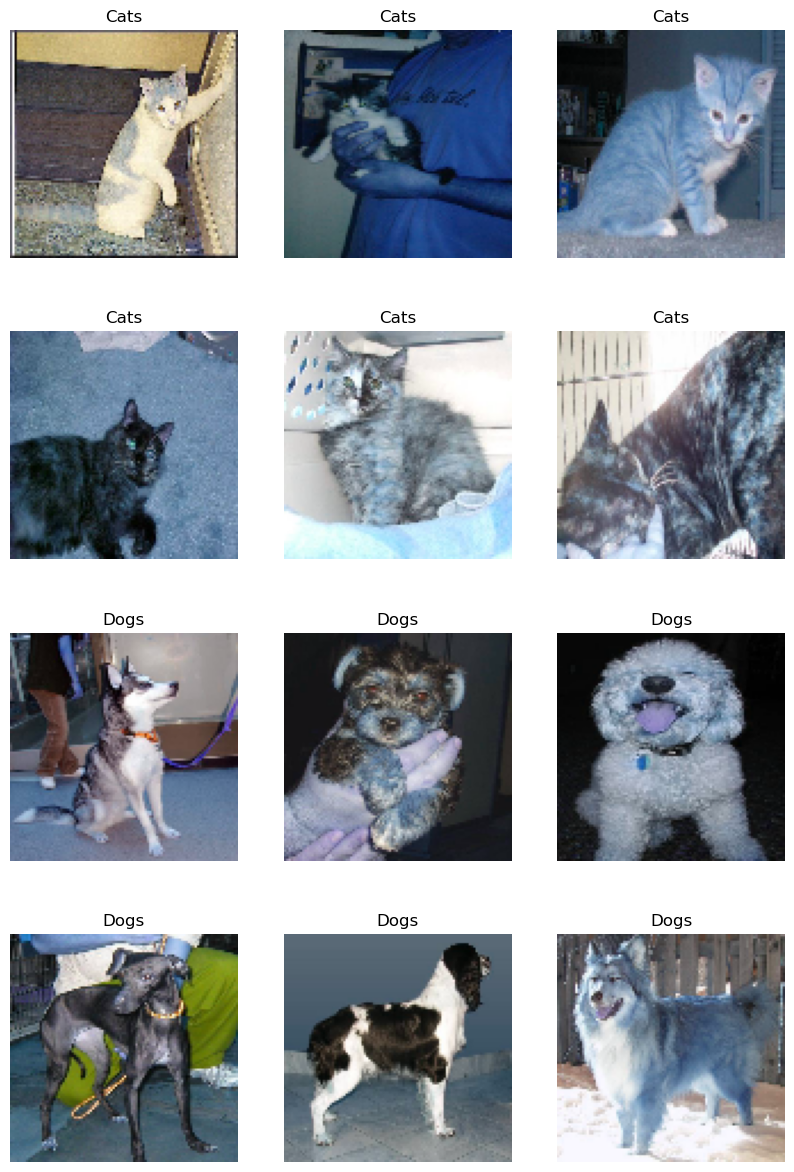

In [7]:
y=1
plt.figure(figsize=(10,15))
for category in categories:
    path=os.path.join(img_test_dir,category)
    x=0
    for img in os.listdir(path):
        try:
            img_arr=cv2.imread(os.path.join(path,img))
            new_img=cv2.resize(img_arr,Img_size)
            if x<6:    
                plt.subplot(4,3,y)
                plt.title(category.capitalize())
                plt.axis('off')
                plt.imshow(new_img)
                x+=1
                y+=1
            else:
                break        
        except Exception as e:
            pass
plt.show()   

In [8]:
testing_data=[]
for category in categories:
    path=os.path.join(img_test_dir,category)
    label_num=categories.index(category)
    for img in tqdm(os.listdir(path)):
        try:
            img_arr=cv2.imread(os.path.join(path,img))
            new_img=cv2.resize(img_arr,Img_size)
            new_img=new_img/255
            testing_data.append([new_img,label_num])
        except Exception as e:
            pass    

100%|██████████| 1013/1013 [01:02<00:00, 16.20it/s]


In [9]:
random.shuffle(testing_data)
testing_data[:5]

[[array([[[0.35294118, 0.29803922, 0.30588235],
          [0.31372549, 0.2627451 , 0.27058824],
          [0.38823529, 0.3372549 , 0.34509804],
          ...,
          [0.18431373, 0.18039216, 0.18823529],
          [0.15686275, 0.16470588, 0.16470588],
          [0.23529412, 0.22745098, 0.21568627]],
  
         [[0.34901961, 0.3254902 , 0.32941176],
          [0.34901961, 0.33333333, 0.33333333],
          [0.38823529, 0.36470588, 0.36862745],
          ...,
          [0.19607843, 0.19215686, 0.20784314],
          [0.17647059, 0.17647059, 0.19215686],
          [0.24313725, 0.23137255, 0.23921569]],
  
         [[0.35686275, 0.35686275, 0.35686275],
          [0.34901961, 0.34901961, 0.34901961],
          [0.35686275, 0.35686275, 0.35686275],
          ...,
          [0.2       , 0.19215686, 0.21568627],
          [0.20784314, 0.20392157, 0.23921569],
          [0.28235294, 0.26666667, 0.29019608]],
  
         ...,
  
         [[0.32941176, 0.29803922, 0.30196078],
          [0.3

In [10]:
x_test=[]
y_test=[]
for record in testing_data:
    x,y=record
    x_test.append(x)
    y_test.append(y)    

In [11]:
x_test=np.array(x_test).reshape(-1,Img_size[0],Img_size[0],3)
y_test=np.array(y_test)

## Read Testing Data by ImageDataGenerator in Keras Library

In [73]:
test_Generator=ImageDataGenerator(
                                    rescale=1./255
                                    )
test_data=test_Generator.flow_from_directory(directory=img_test_dir,
                                                target_size=Img_size,
                                                color_mode='rgb',
                                                class_mode='binary',
                                                shuffle=False,
                                                batch_size=batch_size)

Found 2023 images belonging to 2 classes.


## Saving Preprocessed Data

In [ ]:
pickle.dump(x_train,open('x_train.pkl','wb'))
pickle.dump(y_train,open('y_train.pkl','wb'))
pickle.dump(x_test,open('x_test.pkl','wb'))
pickle.dump(y_test,open('y_test.pkl','wb'))

## Loading Preprocessed Data 

In [2]:
x_train=pickle.load(open('x_train.pkl','rb'))
y_train=pickle.load(open('y_train.pkl','rb'))
x_test=pickle.load(open('x_test.pkl','rb'))
y_test=pickle.load(open('y_test.pkl','rb'))

## Modeling

In [80]:
model=Sequential()
model.add(Input(shape=(Img_size[0],Img_size[1],3)))

model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dropout(0.4))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 50, 50, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 25, 25, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │       589,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,033 (2.61 MB)

 Trainable params: 683,585 (2.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [81]:
cp=ModelCheckpoint( 'cats&dogs_weights.keras',
                    monitor='val_loss',
                    save_best_only=True,
                    verbose=1)
early_stopping=EarlyStopping( monitor='val_loss',
                            min_delta=0.001,
                            patience=5,
                            restore_best_weights=True,
                            verbose=1
                            )
ReduceLR=ReduceLROnPlateau(monitor='val_loss',
                            factor=0.5,
                            patience=5,
                            min_delta=0.001,
                            verbose=1)
callbacks=[cp,early_stopping,ReduceLR]

In [82]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [86]:
history=model.fit(train_data,validation_data=val_data,steps_per_epoch=train_data.samples//train_data.batch_size,epochs=30,callbacks=callbacks)

Epoch 1/30
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 645ms/step - accuracy: 0.7599 - loss: 0.4885
Epoch 1: val_loss did not improve from 0.49948
212/212 ━━━━━━━━━━━━━━━━━━━━ 149s 694ms/step - accuracy: 0.7599 - loss: 0.4885 - val_accuracy: 0.7567 - val_loss: 0.5208 - learning_rate: 0.0010
Epoch 2/30
  1/212 ━━━━━━━━━━━━━━━━━━━━ 2:39 755ms/step - accuracy: 0.7812 - loss: 0.3915
Epoch 2: val_loss did not improve from 0.49948
212/212 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.7812 - loss: 0.3915 - val_accuracy: 0.7558 - val_loss: 0.5159 - learning_rate: 0.0010
Epoch 3/30
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.7847 - loss: 0.4386
Epoch 3: val_loss improved from 0.49948 to 0.45755, saving model to cats&dogs_weights.keras
212/212 ━━━━━━━━━━━━━━━━━━━━ 136s 636ms/step - accuracy: 0.7847 - loss: 0.4386 - val_accuracy: 0.7717 - val_loss: 0.4575 - learning_rate: 0.0010
Epoch 4/30
  1/212 ━━━━━━━━━━━━━━━━━━━━ 1:51 528ms/step - accuracy: 0.8125 - loss: 0.3406
Epoch 4: val_loss did not

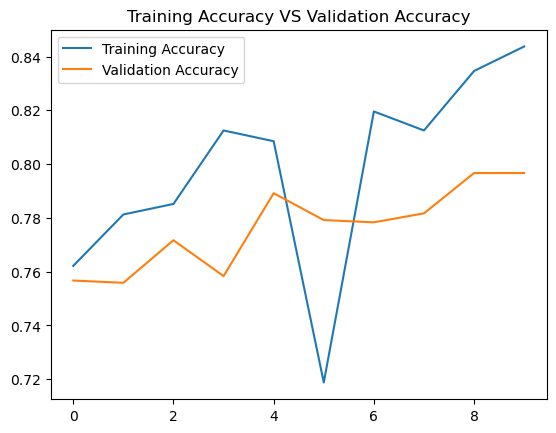

In [87]:
plt.title('Training Accuracy VS Validation Accuracy')
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

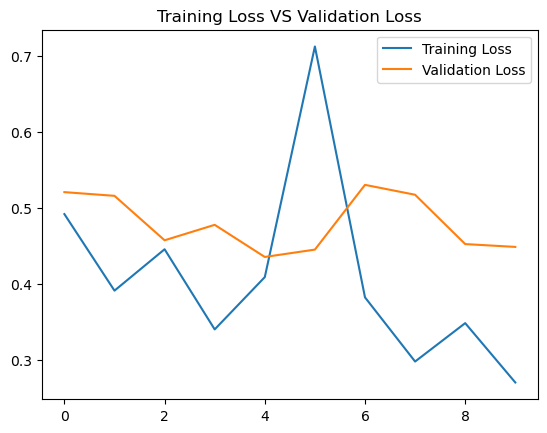

In [88]:
plt.title('Training Loss VS Validation Loss')
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

## Evaluation

In [89]:
model.evaluate(test_data)

64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 349ms/step - accuracy: 0.8310 - loss: 0.4079


[0.47033315896987915, 0.7879387140274048]

In [90]:
pred=model.predict(test_data)
pred[0]

64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 275ms/step


array([0.20869763], dtype=float32)

In [91]:
pred_lst=[int(round(i[0])) for i in pred]
pred_lst[:5]

[0, 0, 0, 0, 1]

In [92]:
y_true=test_data.classes
y_true=y_true.tolist()

In [93]:
report=classification_report(y_true,pred_lst)
print('Classification Report : \n',report)

Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.84      0.80      1011
           1       0.82      0.74      0.78      1012

    accuracy                           0.79      2023
   macro avg       0.79      0.79      0.79      2023
weighted avg       0.79      0.79      0.79      2023



In [94]:
conf_mat=confusion_matrix(y_true,pred_lst)
conf_mat

array([[849, 162],
       [267, 745]], dtype=int64)

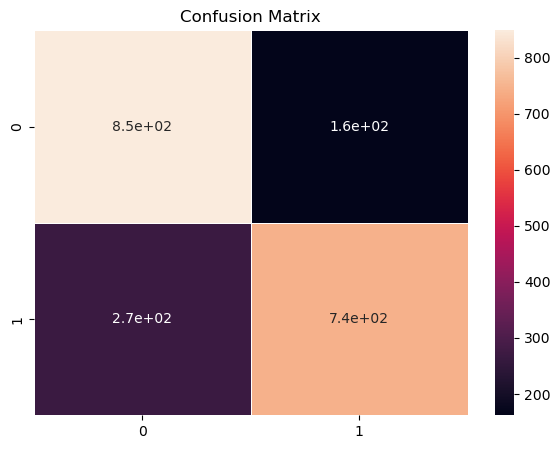

In [97]:
plt.figure(figsize=(7,5))
plt.title('Confusion Matrix')
sns.heatmap(conf_mat,linecolor='white',linewidths=0.5,annot=True)
plt.show()

In [99]:
def num_to_label(num):
    if num==0:
        return 'Cat'
    elif num==1:
        return 'Dog'

In [100]:
y_pred_labels=list(map(num_to_label,pred_lst))
y_pred_labels[:5]

['Cat', 'Cat', 'Cat', 'Cat', 'Dog']

## Saving Model

In [101]:
model.save('model.h5')

## Loading Model

In [ ]:
model=load_model('model.h5')

## Testing Model By downloaded images

In [162]:
def preprocess_img(img_path):
    img=load_img(img_path,target_size=Img_size)
    img_arr=img_to_array(img)
    img_arr=img_arr/255
    img_arr=img_arr.reshape(-1,Img_size[0],Img_size[1],3)
    return img_arr

def predict(img_path):
    preprocessed_img=preprocess_img(img_path)
    pred=model.predict(preprocessed_img)
    pred_num=int(round(pred[0][0]))
    return num_to_label(pred_num)    

In [163]:
def show_img(img_path,predicted_Label):
    img=load_img(img_path,target_size=(224,224))
    plt.title(predicted_Label)
    plt.imshow(img)
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
The Predicted Label :  Dog


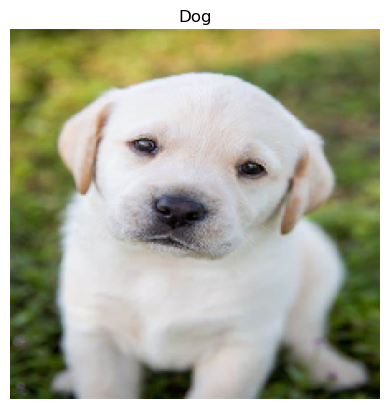

In [164]:
img1=r'1.jpeg'
pred1=predict(img1)
print("The Predicted Label : ",pred1)
show_img(img1,pred1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
The Predicted Label :  Dog


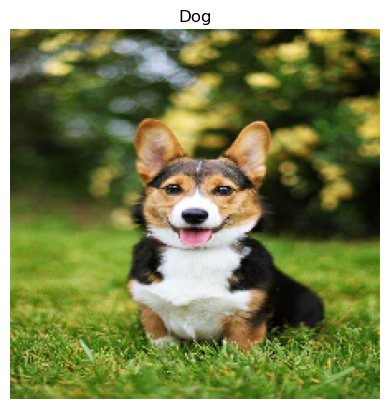

In [165]:
img2=r'2.jpeg'
pred2=predict(img2)
print("The Predicted Label : ",pred2)
show_img(img2,pred2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
The Predicted Label :  Cat


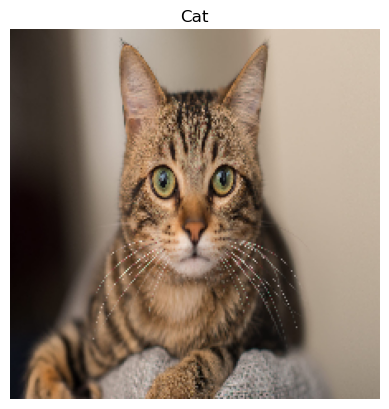

In [166]:
img3=r'3.jpeg'
pred3=predict(img3)
print("The Predicted Label : ",pred3)
show_img(img3,pred3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
The Predicted Label :  Cat


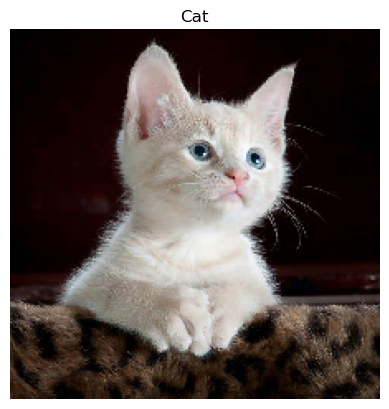

In [167]:
img4=r'4.jpeg'
pred4=predict(img4)
print("The Predicted Label : ",pred4)
show_img(img4,pred4)